# Goal: Visualize Data Sources for ReachMaster
### ReachMaster is a data-rich experimental system that combines multiple readouts of experimental, kinematic, and voltage variables. These variables describe what exactly occurs during an experiment in ReachMaster. For more information on these variables, please see the data tutorial.
## For our case, we are interested visualizing the time-series of the following variables
### Experimental data: Lick detection, trial length, moving (time-course, length)..,inRWZone, rob command pos, rob pos, 
### Kinematic data: x, y, z and p of bodyparts over time
## We will combine these two data sources to create visuals describing how data sources vary from trial to trial due to various behaviors. 
## We will then examine these time-series variables over entire experimental sessions between different rats, days, sessions, and dimensions. 
## Together, this will allow us to estimate approaches to classifying different trial types as well as estimating phases in behavior.


In [1]:
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d
import seaborn as sns
import pandas
import scipy
import pdb
import pandas as pd
import pickle
from Analysis_Utils import import_robot_data,preprocessing_df

from Analysis_Utils import query_df
import DataStream_Vis_Utils as utils
### MAKE MATLAB BEAUTIFUL
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
              CB91_Purple, CB91_Violet]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)
sns.set(font='Franklin Gothic Book',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":18})

plt.legend(frameon=False)


def import_robot_data(df_path):
    df = pd.read_hdf(df_path)
    df = preprocessing_df(df)
    return df


def preprocessing_df(df):
    list_of_names=['r','t1','t2','x_p','y_p','z_p','RW']
    #shaking = xform_variables_to_numpy(df,list_of_names)
    shaking = dim_change(df)
    shaking=date_wipe(shaking)
    return shaking
    


def xform_variables_to_numpy(df, list_of_names):
    for i in list_of_names:
        for k, row_value in df[i].iteritems():
            x=str(df[i][k])
            x=x.strip('[,]')
            x=x.replace('...',"").replace('\n',"").replace('[',"").replace(']',"").replace('r',"")
            x=x.replace('..',"").replace('xp',"").replace('time',"").replace('object',"")
            x=x.replace(',',"").replace('inRewardWin',"")
            x=x.replace('Name:',"").replace('_',"").replace('robmoving',"")
            x=x.replace('rob_moving',"").replace("Length","").replace(':',"").replace("dtype","").replace("int64","")
            x=x.replace('inRewardWin',"")
            x=str(x).split()
            df.loc[i,k] = [pd.Series(np.asarray(x, dtype=np.float32)).reset_index()]
    return df


def date_wipe(df):
    d=[]
    for index, row_value in df['Date'].iteritems():
        if "_" in row_value:
            d.append((row_value)[4:6])
        else:
            d.append((row_value)[5:7])
    df['Date']=d
    return df


def dim_change(df):
    for k,x in enumerate(df['dim']):
        try:
            if "cone" in x:
                df['dim'][k] = 3
            elif "20mm" in x:
                df['dim'][k] = 0
            elif "10mm" in x:
                df['dim'][k] = 0
            else:
                df['dim'][k] = 0
        except:
            continue
    return df


No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [2]:
# load in robot data
df = import_robot_data('default_save.h5')
df = df.reset_index(drop=True)
# load in camera data
kin_df = pickle.load( open( "k_data.pkl", "rb" ) ) # imports a list of kinematic variables for experiments from RM16
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,rat,S,Date,dim,time,m_start,m_stop,SF,t_m,lick,...,x0,y0,z0,moving,RW,r_start,r_stop,r,t2,t1
0,RM9,S2,18,3,"[20.859866697184316, 20.8858667200725, 20.9028...","[31.668866712443105, 67.45086677729296, 105.33...","[35.674866754404775, 71.4538667982738, 109.495...","[2, 3, 4, 5, 6, 7, 8, 9, 13, 17, 19, 20, 21, 2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 35.6913, 35.6982, 36.564233333333334, 10...",...,1024,608,531,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0 0 1 0 2 0 3 0 4 ...,"[1513, 6563, 12020, 13242, 20341, 21483, 22472...","[2077, 7124, 12612, 13736, 21060, 22046, 23017...",916.8 916.8 655.4 916.8 614.4 614.4 655.4 916....,491.3 571.1 361.6 571.1 531.0 531.0 707.5 491....,648.8 648.8 794.8 648.8 608.0 608.0 794.8 648....
1,RM9,S1,18,3,"[20.414766451136302, 20.440766474024485, 20.48...","[89.86176647783918, 99.30376662851972, 174.025...","[93.86576666475935, 103.30476655604048, 179.71...","[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 179.05716666666666, 179.09396666666666, ...",...,1024,608,531,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0 0 1 0 2 0 3 0 4 ...,"[9864, 11201, 21864, 24920, 26074, 27904, 2992...","[10430, 11766, 22667, 25452, 26535, 28404, 304...",614.4 614.4 614.4 614.4 614.4 614.4 614.4 614....,531.0 531.0 531.0 531.0 531.0 531.0 531.0 531....,608.0 608.0 608.0 608.0 608.0 608.0 608.0 608....
2,RM9,S3,18,3,"[19.026683361943583, 19.089683564122538, 19.10...","[34.658683331426005, 117.32368353169761, 142.7...","[38.665683539327006, 121.32568338673912, 146.1...","[2, 3, 6, 9, 12, 14, 15, 16, 18, 20, 21, 23]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 122.51423333333334, 122.51763333333334, ...",...,1024,608,531,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0 0 1 0 2 0 3 0 4 ...,"[2191, 14018, 17703, 18863, 21270, 31546, 3251...","[2753, 14597, 18205, 19352, 21850, 32097, 3301...",655.4 916.8 916.8 916.8 916.8 655.4 655.4 916....,707.5 571.1 571.1 571.1 491.3 361.6 707.5 491....,449.0 568.6 648.8 648.8 568.6 449.0 794.8 648....
3,RM9,S4,18,3,"[21.447966702906342, 21.479966767756196, 21.52...","[34.8089667639415, 152.94096673342392, 159.957...","[38.812966712443085, 156.9469667753856, 163.96...","[4, 5, 7, 10, 11, 12, 13, 14, 15, 16, 19, 20, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 214.57526666666666, 214.68453333333332, ...",...,1024,608,531,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0 0 1 0 2 0 3 0 4 ...,"[1873, 18701, 19694, 20832, 26812, 32196, 3331...","[2439, 19269, 20261, 21394, 27761, 32686, 3388...",916.8 614.4 655.4 655.4 655.4 916.8 916.8 655....,571.1 531.0 361.6 707.5 361.6 491.3 491.3 361....,648.8 608.0 449.0 794.8 449.0 648.8 648.8 449....
4,RM9,S1,19,3,"[20.34046666857398, 20.412466695276862, 20.439...","[36.99546687838233, 93.67546670672095, 103.992...","[40.99946682688392, 97.68146674868262, 107.997...","[3, 5, 9, 12, 13, 16, 19, 20, 21, 22, 23, 27, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 108.04173333333334, 108.04273333333333, ...",...,1024,608,531,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0 0 1 0 2 0 3 ...,"[2332, 10392, 11884, 13810, 15792, 18687, 2008...","[2898, 10977, 12461, 14321, 16370, 19248, 2064...",655.4 916.8 655.4 655.4 916.8 655.4 916.8 655....,361.6 491.3 707.5 707.5 571.1 361.6 491.3 707....,794.8 648.8 794.8 449.0 568.6 449.0 568.6 449....


# I will examine 4 different days.
## RM16, 9/20, s3, dim=3D (9pt3dcone)
## RM16, 9/20, s4, 
## RM16, 9/25, s2/3
## RM16, 9/28, s2

In [3]:
# Obtain Single Session Data
dd_1 = utils.get_single_trial(df,'20','S3','RM16')
dd_1 = dd_1.reset_index(drop=True)

dd_2 = utils.get_single_trial(df,'20','S4','RM16')
dd_2 = dd_2.reset_index(drop=True)

dd_3 = utils.get_single_trial(df,'25','S3','RM16')
dd_3 = dd_3.reset_index(drop=True)

dd_4 = utils.get_single_trial(df,'27','S4','RM16')
dd_4 = dd_4.reset_index(drop=True)

# Diff Rat (14)
dd_1_RM14 = utils.get_single_trial(df,'20','S3','RM14')
dd_1_RM14 = dd_1_RM14.reset_index(drop=True)

# Diff Dim
dd_5 = utils.get_single_trial(df,'17','S2','RM16')
dd_5 = dd_5.reset_index(drop=True)


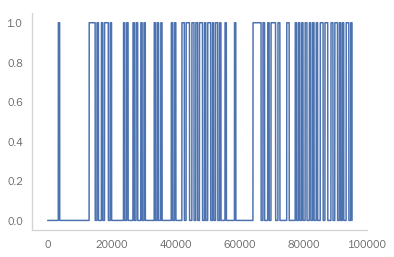

In [4]:
moving = dd_1['moving'].values
moving[0].shape
plt.plot(moving[0])
plt.show()

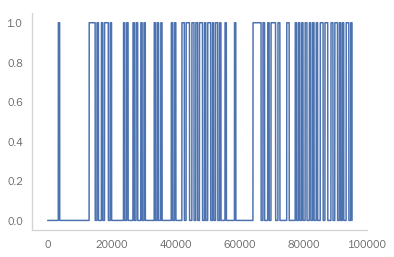

In [5]:
rz = dd_1['RW'].values
rz[0].shape
plt.plot(moving[0])
plt.show()

## OK, let's start with the first dataframe, for RM16, 9/20, session 3 (dd_1)
## We would like to obtain the successful single trial time-series for the experimental variables we are interested in from this experimental session-wide dataframe.

In [6]:
def clean_exp_row(row_df):
    x=str(row_df)
    x=x.strip('[,]').strip('(,)')
    x=x.replace('..',"").replace('Name:',"").replace('in_Reward_Win',"").replace(',',"").replace('Length:','')
    x=x.replace('\n',"").replace('[',"").replace(']',"").replace('array',"").replace('int64',"").replace(':',"").replace('...',"").replace('dtype',"")
    x=str(x).split()
    x=np.asarray(x,dtype=np.float)
    return x


def clean_e_row(row_df):
    x=str(row_df)
    filter( lambda x: x in '0123456789.', row_df )
    x=x.replace('..',"").replace('Name:',"").replace('in_Reward_Win',"")
    x=str(x).split()

    return x


def extract_trial_data_from_session(df, start, stop, features):
    ### Code intended to extract single trial data features from the experimental dataframe from an experimental block. 
        
    ###
    # clean in-coming data 
    # Allocate numpy array
    sz=len(features)
    lz=int(stop-start)
    a = {}
    # slice dataframe into arrays for time-series visualization
    for c,v in enumerate(features):
        if 'time' in v:
            a.update({v:np.ravel(df['time'])})
            continue
        z=0
        ix = df[v].values[0]
        if isinstance(ix, np.ndarray):  
            ix=np.asarray(ix)
        else:
            ix=clean_e_row(ix)
            #ix=np.asarray(ix,dtype=np.float)
        #lx=ix.shape[0]
        #pdb.set_trace()
        a.update({v:np.ravel(ix)})
    #dataframe = pd.DataFrame({a},columns=features)
    return a


    
trial_list = []
features = ['moving','RW','lick','t_m','x_p','y_p','z_p','time']
# extract the trial time-series lists
start=dd_1['r_start'].values
start=start[0]
stop=dd_1['r_stop'].values
stop=stop[0]
for c,v in enumerate(start):
    #print(v,stop[c])
    trial_list.append(extract_trial_data_from_session(dd_1,v,stop[c],features))
    
print('Number of Trials Extracted is' + str(len(stop)))
trial_list[0].keys()

Number of Trials Extracted is50


dict_keys(['moving', 'RW', 'lick', 't_m', 'x_p', 'y_p', 'z_p', 'time'])

## We now have access to all the experimental data from RM16, 9/20, S3 Block. Let's look at the time-series data of some successful trials vs unsuccessful trials. A successful trial is defined as a reach and grasp of the handle that ends in the reward zone (indicated by the RW variable). There are several flavors of a failed trial with the ReachMaster system. The first is a potential failure to retract the handle during the trial and not fulfilling the successful requirement of a experiment. However, a reach has occured and can/ should be observed. Additionally, there are reaches that completely fail to make contact with the handle and miss. These trial types and their corresponding reaches can be found through classification of simultaneously recorded 3-D kinematic data of FAILED trials. Finally, there are trials that are triggered by noise in the video trigger of the camera's experimental system which cause false trials to be observed.

# Successful Trial

<Figure size 432x288 with 0 Axes>

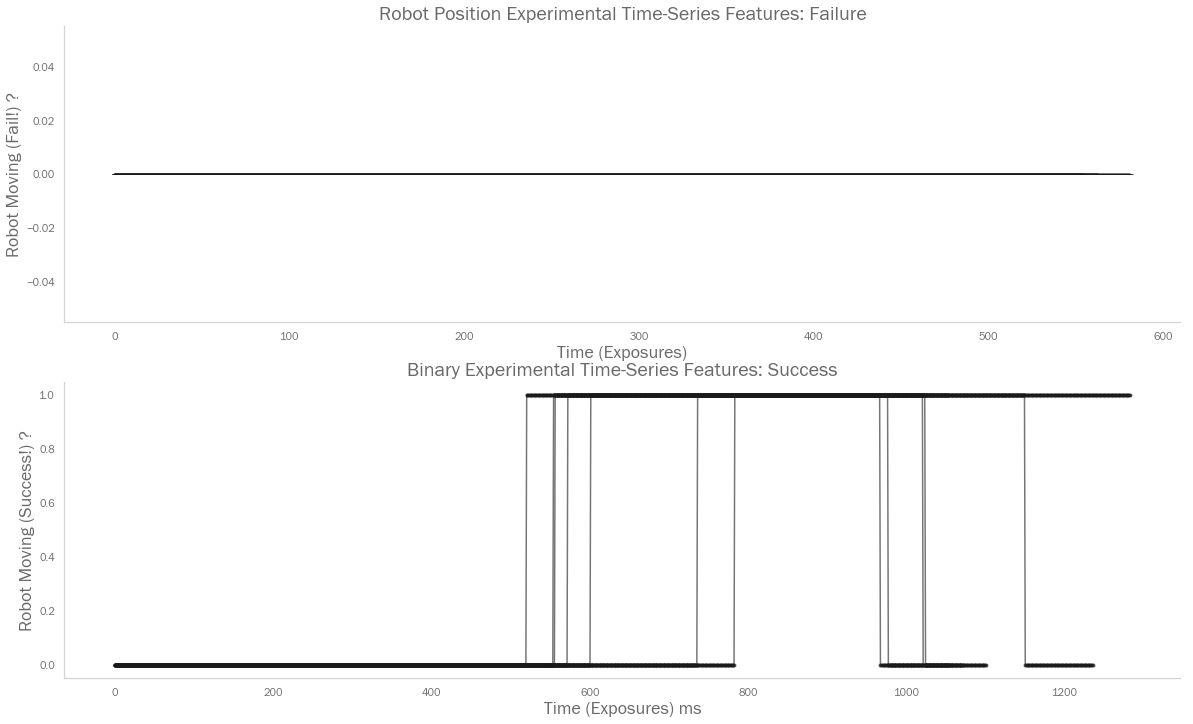

(95171,)

In [7]:
# successful trials = 1,2,3,4,6,20,21,18 (among others, chose these at random!)
successful_trials=[1,2,3,4,6,20,18]
failed_trials=[0,5,14,13,12]
trial_num=len(stop)
sf=str(dd_1['SF']).split()
s=dd_1['SF']
# Plot histogram of data catagories for successful and failed trails
def plot_succ_fail(df,sf):
    ### takes in blocks experimental dataframe, list of successful trials in a block
    ###
    # initialize the subplots for succ and failure
    plt.tight_layout()
    fig, (ax1, ax) = plt.subplots(2,figsize=(20, 12))
    ax.set_xlabel('Time (Exposures) ms')
    ax.set_ylabel('Robot Moving (Success!) ?')
    ax.set_title('Binary Experimental Time-Series Features: Success')
    ax1.set_xlabel('Time (Exposures)')
    ax1.set_ylabel('Robot Moving (Fail!) ?')
    #ax1.legend()
    ax1.set_title('Robot Position Experimental Time-Series Features: Failure')
    for i in range(0,trial_num-40):
        st=start[i]
        stx=stop[i]
        trial=trial_list[i]
        #ax.plot(trial['moving'],marker='x',color='r',alpha=0.01,label='Moving?')
        if i in (sf[0]):
            # binary features
            
            ax.plot(trial['moving'][st:stx+500],marker='.',color='k',alpha=0.6,label='Moving (Successful Trial)')
            #ax.plot(trial['RW'][0].T[st:stx+500],marker='.',color='y',label='In Reward Zone (Successful Trials)') # this should be present in all trials
        else:
            # plot these on another plot somewhere else (?)
            ax1.plot(trial['moving'][st:stx],marker='_',color='k',alpha=0.8,label='Moving (Failed Trial)')
    #plt.legend()
    plt.show()
plot_succ_fail(dd_1,s)
dd_1['RW'][0].shape

## There is a distinct epoch in the moving time-series of the robot embedded into the experiment. The reaching start and end times begin and end around the same time period and there is a resulting end of movement around the same time window between trials. 
### We can ask 'how long' the robot is moving by calculating the length of the movement vector the robot has. I won't do this right this second, but I will do this across multiple blocks
## Let's see where all the other experimental variables fit in

<Figure size 432x288 with 0 Axes>

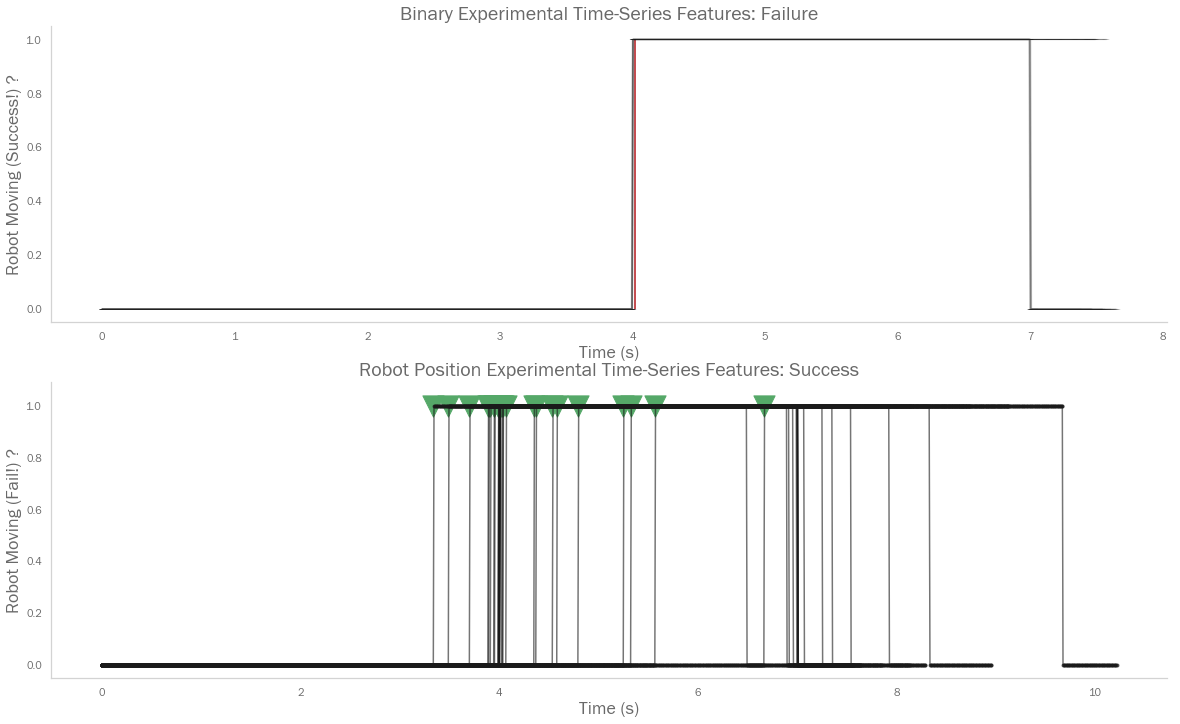

(95171,)

In [8]:
successful_trials=[1,2,3,4,6,20,18]
failed_trials=[0,5,14,13,12]
trial_num=len(stop)
sf=str(dd_1['SF']).split()
s=dd_1['SF']
def find_len_moving(moving,time):
    for c, v in moving:
        if v == 1:
            if moving[v-1] == 0:
                start=c
            if moving[v+1] == 0:
                stop=c
        else:
            continue
        moving_length=time[stop]-time[start]
    return moving_length
# Plot histogram of data catagories for successful and failed trails
def plot_succ_fail(df,sf):
    ### takes in blocks experimental dataframe, list of successful trials in a block
    ###
    # initialize the subplots for succ and failure
    plt.tight_layout()
    fig, (ax, ax1) = plt.subplots(2,figsize=(20, 12))
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Robot Moving (Success!) ?')
    ax.set_title('Binary Experimental Time-Series Features: Failure')
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Robot Moving (Fail!) ?')
    #ax1.legend()
    ax1.set_title('Robot Position Experimental Time-Series Features: Success')
    for i in range(0,trial_num):
        st=start[i]
        stx=stop[i]
        trial=trial_list[i]
        time=trial['time'][0][st:stx+500]
        start_time= trial['time'][0][st:stx]
        exp_time=np.asarray(time,dtype=float)-time[0] # this is normalized trial time
        REW_time=start_time[-1]-start_time[0]
        #ax.plot(trial['moving'],marker='x',color='r',alpha=0.01,label='Moving?')
        if i in (sf[0]):
            ax1.plot(exp_time,trial['moving'][st:stx+500],marker='.',color='k',alpha=0.6,label='Moving (Successful Trial)')
            #ax1.vlines(REW_time,ymin=0.5, ymax=0.5)
            ax1.scatter(REW_time,1,marker='v',color='g',s=450,label='In Reward Zone (Successful Trials)') # this should be present in all trials
        else:
            # plot these on another plot somewhere else (?)
            ax.vlines(4.02,ymin=1,ymax=0,color='r',label='Exp_End')
            ax.plot(exp_time,trial['moving'][st:stx+500],marker='_',color='k',alpha=0.1,label='Moving (Failed Trial)')
    plt.show()
plot_succ_fail(dd_1,s)
dd_1['RW'][0].shape

## As seen above, experiments begin to 
## Now let's look at another set of experimental features, robot movement, or interaction,  lengths. This feature is intended to let us know exactly how the rat is interacting with the handle (more, less, well behaved?). With kinematic tracking, we can seperate out well-behaved trials (release of handle as it moves to next position) vs poor trials (no release, re-grasp etc). 

ValueError: x and y must be the same size

<Figure size 432x288 with 0 Axes>

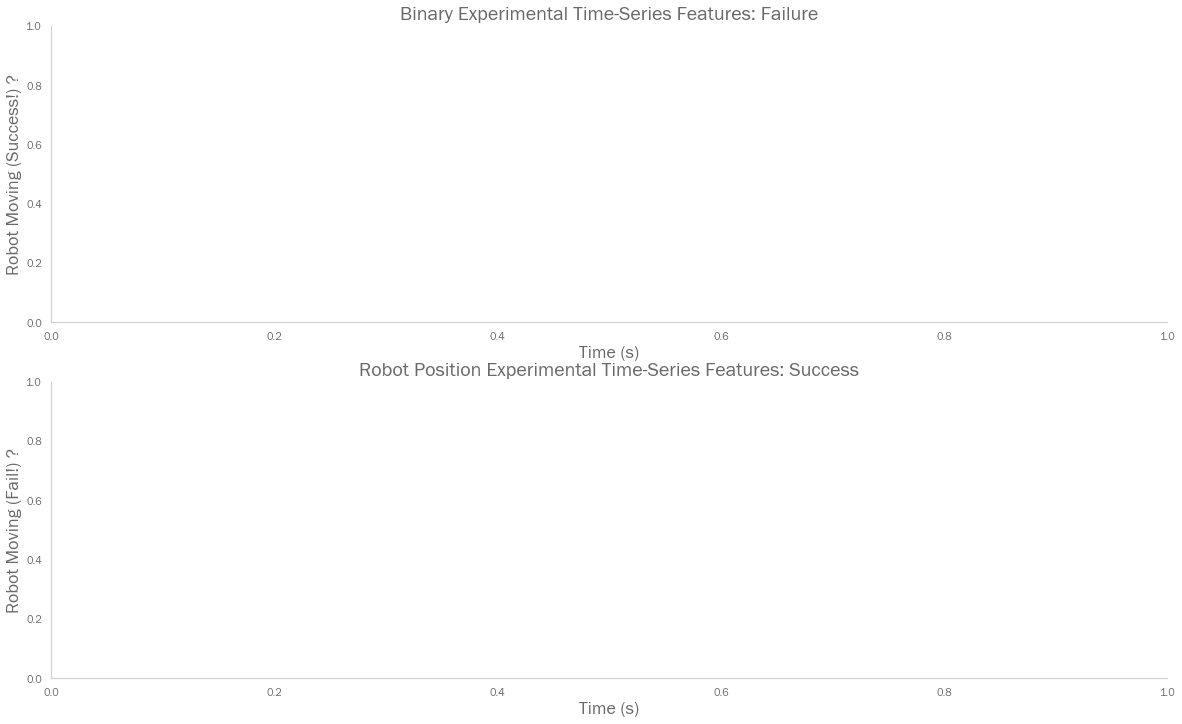

In [9]:
import matplotlib.pyplot as plt
def find_len_moving(moving,time):
    for c, v in moving:
        if v == 1:
            if moving[v-1] == 0:
                start=c
            if moving[v+1] == 0:
                stop=c
        else:
            continue
        moving_length=time[stop]-time[start]
    return moving_length
def plot_succ_fail(df,sf):
    ### takes in blocks experimental dataframe, list of successful trials in a block
    ###
    # initialize the subplots for succ and failure
    plt.tight_layout()
    fig, (ax, ax1) = plt.subplots(2,figsize=(20, 12))
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Robot Moving (Success!) ?')
    ax.set_title('Binary Experimental Time-Series Features: Failure')
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Robot Moving (Fail!) ?')
    #ax1.legend()
    ax1.set_title('Robot Position Experimental Time-Series Features: Success')
    moving_length = []
    s_move=[]
    f_move=[]
    licking_length=[]
    total_rew_time=[]
    trial_num=len(sf)
    for i in range(0,trial_num):
        st=start[i]
        stx=stop[i]
        trial=trial_list[i]
        time=trial['time'][0][st:stx+500]
        start_time= trial['time'][0][st:stx]
        exp_time=np.asarray(time,dtype=float)-time[0] # this is normalized trial time
        REW_time=start_time[-1]-start_time[0]
        moving_length.append(REW_time)
        
        #ax.plot(trial['moving'],marker='x',color='r',alpha=0.01,label='Moving?')
        if i in (sf[0]):
            s_move.append(REW_time)
            ax1.plot(exp_time,trial['moving'][st:stx+500],marker='.',color='k',alpha=0.6,label='Moving (Successful Trial)')
            ax1.plot(exp_time,np.asarray(trial['RW'][0][st:stx+500],dtype=float),color='b',alpha=0.8,label='Robot in Reward Area')
            #ax1.plot(exp_time,trial['lick']
            #ax1.vlines(REW_time,ymin=0.5, ymax=0.5)
            ax1.scatter(REW_time,1,marker='v',color='r',s=380,label='End of Experiment') # this should be present in all trials
        else:
            f_move.append(REW_time)
            ax1.scatter(exp_time,np.asarray(trial['RW'][st:stx+500],dtype=float),color='b',alpha=0.8,label='Robot in Reward Area')
            # plot these on another plot somewhere else (?)
            ax.plot(exp_time,trial['moving'][st:stx+500],marker='_',color='k',alpha=0.8,label='Moving (Failed Trial)')
            ax.scatter(REW_time,0,marker='v',color='r',s=380,label='End of Experiment')

    colors = ['black', 'red', 'green','blue']
    lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='--') for c in colors]
    labels = ['Robot Movement', 'Experiment start and finish', 'Handle in Reward Area', 'Licking']
    plt.legend(lines, labels)
    plt.show()
    return moving_length, s_move, f_move
moving_length, s_move, f_move=plot_succ_fail(dd_1,s)



In [ ]:
moving_length2, s_move2, f_move2=plot_succ_fail(dd_2,dd_2['SF']) # rat 16, 9/20, s4

In [ ]:
moving_length3, s_move3, f_move3=plot_succ_fail(dd_3,dd_3['SF']) # rat 14, 9/20, s3 (same block dd_1, diff rat)

In [ ]:
moving_length4, s_move4, f_move4=plot_succ_fail(dd_4,dd_4['SF']) # rat #16, 9/17, s3 (0-D case)

In [ ]:
moving_length5, s_move5, f_move5=plot_succ_fail(dd_5,dd_5['SF']) # rat #16, 9/17, s3 (0-D case)

## Single Trials

<Figure size 432x288 with 0 Axes>

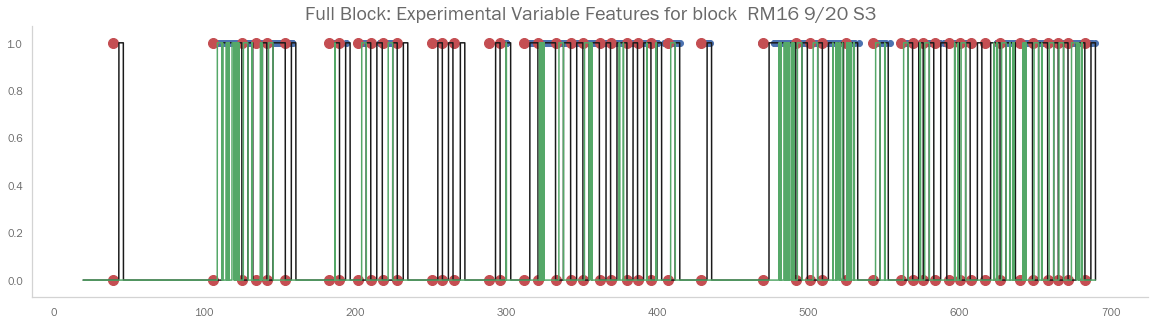

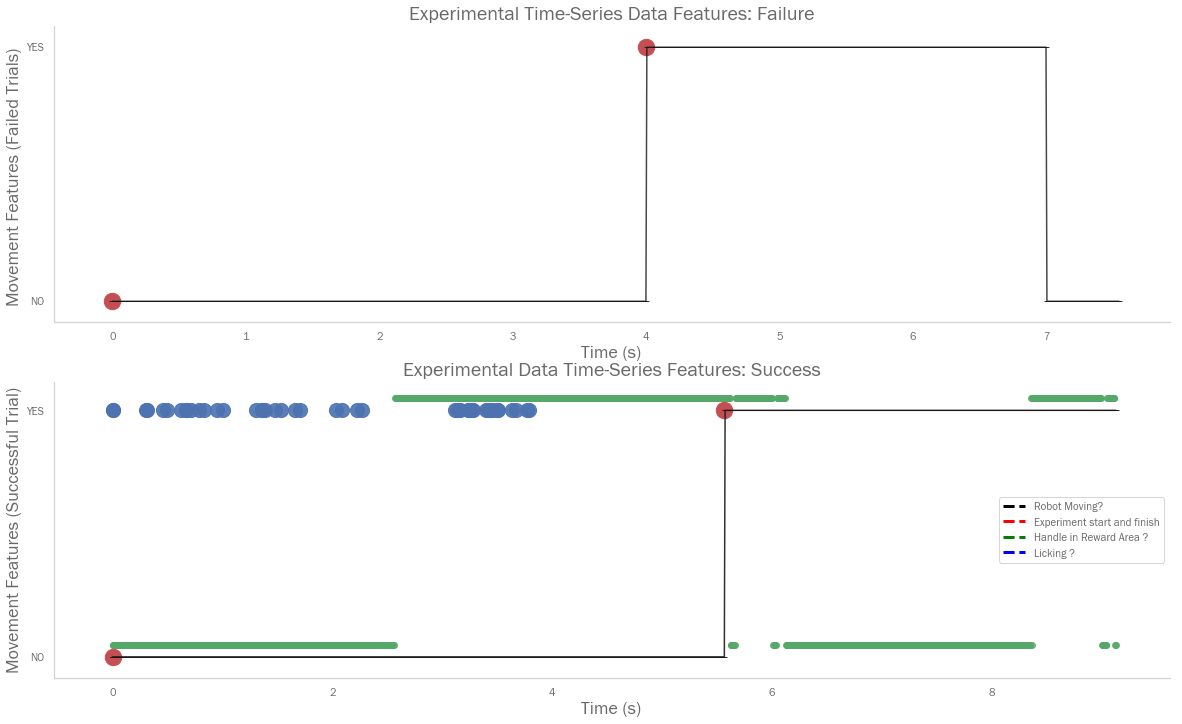

Showing Trial Number  [ 1  2  3  4  6  7  8 10 17 18 19 20 21 22 23 24 25 26 27 28 30 31 32 33
 34 35 37 38 39 40 43 44 45 46 47 48]
Total Trials in Block: 50
Number of estimated reaches 69
Average Length of Licking (in seconds) 2.6877141666666695
Average Time Spent in The Reward Area 0.2
Average Successful Trial Length (in seconds)  4.218388888570997


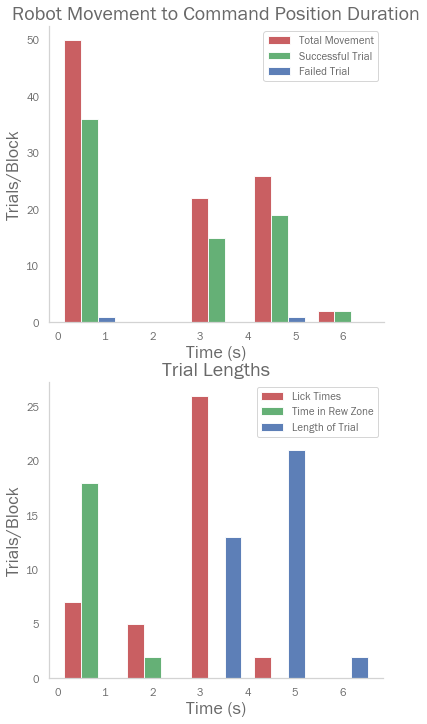

In [147]:
from matplotlib.lines import Line2D

# Re-Grasp maybe +2 seconds no lick
# 

def get_simple_lick_times(lick,start,stop, exp_time):
    lick_index=[]
    b=1
    #pdb.set_trace()
    
    for i in lick:
        #pdb.set_trace()
        if start <= i <= stop+1:
            lick_index.append(i-start) 
        # get lick start/stop times
    #pdb.set_trace()
    try:
        lick_index=np.asarray(lick_index,dtype=float)
    except:
        lick_index=[0,0]
    try:
        lick_index=lick_index-lick_index[0] #normalize exp times
    except:
        lick_index=[0,0]
        b=0
    try:
        lick_start=lick_index[0]
    except:
        lick_start=0
    try:
        lick_end=lick_index[-1]
    except:
        lick_end=0
    
    
    return lick_start,lick_end, lick_index,b


def rz_length(rz_array,time_array):
    ### Takes in matched length Reward Zone and Normalized Time arrays (m_times)
        
    ###
    mask=np.zeros(len(time_array))
    for ix,ct in enumerate(rz_array):
        if ct == 1:
            mask[ix]=1
    # get rough amt of time spent in reward zone w/ # of exposures
    # exposures are variable, but only to 4th float place so we are ok (ms)
    rz_len = np. count_nonzero(mask == 1)
    flip=0
    for ji,jn in enumerate(mask):
        try:
            if jn == 1:
                if mask[ji-1]==0:
                    if mask[ji+1]==1:
                        if mask[ji-20]==0:
                            flip+=1
        except:
            flip=flip
    return rz_len,flip
        

def trial_length(start,stop,sf):
    t_length = []
    reward_region = []
    for i,x  in enumerate(start):
        if i in sf:
            t_length.append(stop[i]-x)
            reward_region.append(stop[i]+200-x+50)
    return t_length,reward_region

def plot_succ_fail_single(df,s,f,s_id='RM16 9/20 S3',trial_plot=True,plotting=True,
                          verbose=True,hist=True,save_fig=False,single_trial=[1],failed_trial=[0], kin_data=False,prob=False):
    ### takes in blocks experimental dataframe, list of successful trials in a block
    ###
    # initialize the subplots for succ and failure
    plt.tight_layout()
    moving=df['moving'].to_numpy()[0]
    RW=df['RW'].to_numpy()[0]
    licks = df['lick'].to_numpy()[0][1::]
    block_starts=df['m_start'].to_numpy()[0]
    block_stops=df['m_stop'].to_numpy()[0]
    block_time = df['time'].to_numpy()[0]
    m_start=df['m_start'].to_numpy()[0]
    m_stop=df['m_stop'].to_numpy()[0]
    trial_num=len(m_start)
    SF=df['SF'].to_numpy()[0]
    trial_lengths,r_lengths = trial_length(m_start,m_stop,SF)
    TSF=df['SF'].to_numpy()[0]
    if trial_plot:
        fx,g=plt.subplots(1,figsize=(20,5))
        g.plot(block_time,moving,color='k')
        g.plot(block_time,RW,color='g')
        g.scatter(licks,np.ones(len(licks)),color='b')
        g.scatter(m_start,np.zeros(len(m_start)),color='r',s=100)
        g.scatter(m_start,np.ones(len(m_start)),color='r',s=100)

        g.set_title('Full Block: Experimental Variable Features for block  ' + s_id)
        #g.scatter(m_start,np.zeros((m_start.shape[0])),color='r')
        #g.scatter(m_stop,np.ones(m_stop.shape[0]),color='r')
        plt.show()
    ### Sub-Trial Single Trial(s)Plot
    if plotting:
        fig, (ax, ax1) = plt.subplots(2,figsize=(20, 12))
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Movement Features (Failed Trials) ')
        ax.set_title('Experimental Time-Series Data Features: Failure')
        ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('Movement Features (Successful Trial)')
        #ax1.legend()
        ax1.set_title('Experimental Data Time-Series Features: Success')
        moving_length = []
        s_move=[]
        f_move=[]
        t_rew_time=[]
        t_lick = []
        flips = 0
        ### function to extract single trial data + plots
        for i in range(0,trial_num):
            #print('Trial Number ' + str(i))
            st=start[i]
            stx=stop[i]
            st_real=m_start[i]
            stx_real=m_stop[i]
            time=df['time'][0][st:stx+500]
            start_time= df['time'][0][st:stx]
            rz = df['RW'].to_numpy()[0][st:stx+500]
            r_len=len(rz[st:stx])
            lick=df['lick'].to_numpy()[0]
            # obtain licking indices
            lstart,lstop,li,b=get_simple_lick_times(lick,st_real,stx_real,time)
            exp_time=np.asarray(time,dtype=float)-time[0] # this is normalized trial time
            REW_time=[0,start_time[-1]-start_time[0]]
            moving_length.append(REW_time)
            rz_len,rz_c = rz_length(rz,exp_time)
            if rz_len < 5: # check that no spurious values get by
                t_rew_time.append(rz_len)
            if b:
                t_lick.append(li[-1])
            if i in s:
                    s_move.append(REW_time)
            if i in f:
                f_move.append(REW_time)
            flips += rz_c
            if single_trial:
                if i in single_trial:
                    ax1.plot(exp_time,df['moving'].to_numpy()[0][st:stx+500],marker='_',color='k',alpha=0.9,
                             label='Moving (Successful Trial)')
                    ax1.scatter(exp_time,rz+0.05,color='g',alpha=0.8,label='Robot in Reward Area')
                    if b:
                        plt.scatter(li,np.ones(len(li)),color='b',s=200,alpha=0.9,label='Rat Licking')
                    ax1.scatter(REW_time,[0,1],marker='.',color='r',s=1080,label='Start and End of Experiment in ReachMaster') 
                    # this should be present in all trials
                if i in failed_trial:
                    plt.hlines(y=1, xmin=li[0], xmax=li[-1], linewidth=2, color='b',label='Rat Licking')
                    ax.plot(exp_time,df['moving'].to_numpy()[0][st:stx+500],marker='_',color='k',alpha=0.8,label='Moving (Failed Trial)')
                    ax.scatter(REW_time,[0,1],marker='.',color='r',s=1080,label='End of Experiment')
        colors = ['black', 'red', 'green','blue']
        lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='--') for c in colors]
        labels = ['Robot Moving?', 'Experiment start and finish', 'Handle in Reward Area ?', 'Licking ?']
        plt.legend(lines, labels)
        #### Set up Binary Y-AXIS ###
        a=ax.get_yticks().tolist()
        a[1]='NO'
        a[2] = ''
        a[3] = ''
        a[4] = ''
        a[5] =''
        a[6]='YES'
        ax.set_yticklabels(a)
        ax1.set_yticklabels(a)
        if save_fig:
            plt.savefig('Exp_47_R16_s3_20.png')
        
        #plt.title('Single Trial Data Stream')
        plt.show()
    if verbose:
        print('Showing Trial Number  ' + str(s))
        print('Total Trials in Block: ' + str(trial_num))
        print('Number of estimated reaches ' +  str(flips))
        print('Average Length of Licking (in seconds) ' + str(np.mean(t_lick)))
        print('Average Time Spent in The Reward Area ' + str(np.mean(t_rew_time)))
        print('Average Successful Trial Length (in seconds)  ' + str(np.mean(trial_lengths)) )
    if hist:
        fsg, (ax2,ax3) = plt.subplots(2,figsize=(6,12))
        ax2.hist([moving_length,s_move,f_move],bins=5,color=['r','g','b'],alpha=0.9,label=['Total Movement','Successful Trial','Failed Trial'])
        ax2.set_title('Robot Movement to Command Position Duration')
        ax2.set_xlabel('Time (s)')
        ax2.set_ylabel('Trials/Block')
        ax3.hist([t_lick,t_rew_time,trial_lengths],bins=5,color=['r','g','b'],alpha=0.9,label=['Lick Times','Time in Rew Zone','Length of Trial'])
        ax2.legend(loc='upper right')
        ax3.set_title('Trial Lengths')
        ax3.set_xlabel('Time (s)')
        ax3.set_ylabel('Trials/Block')
        ax3.legend(loc='upper right')
        plt.show()
    return moving_length, s_move, f_move, trial_num, flips, t_lick, t_rew_time,trial_lengths

moving_length5, s_move5, f_move5,t,flips,tl,trw,tlen=plot_succ_fail_single(dd_1,dd_1['SF'].to_numpy()[0],[0])

# It is now obvious that different trial types can be distinguished by basic experimental features. Let's dive into single trial examples with these features. The first: The successful single reach

# The successful single reach is distinguished from other trial types through several feature differences. Plotting the single trial variables of robot movement, reward zone positioning, trial beginning and end, and licking as a time series for each of these trial types with accompanying kinematic data and raw video is the start of our behavioral classification.

<Figure size 432x288 with 0 Axes>

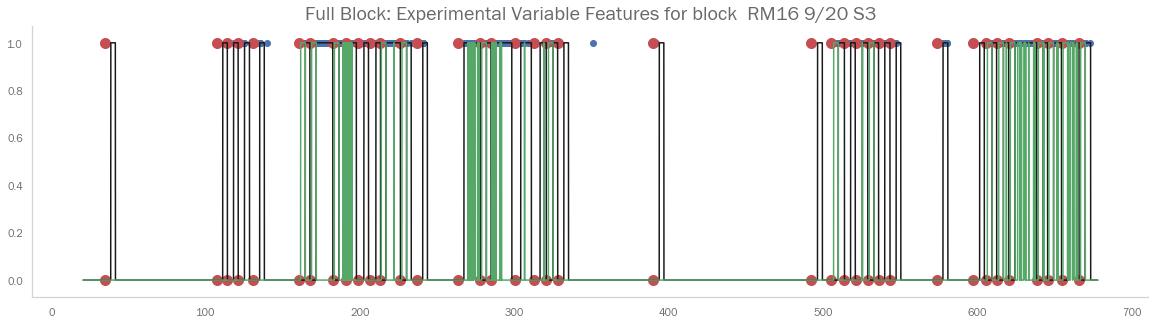

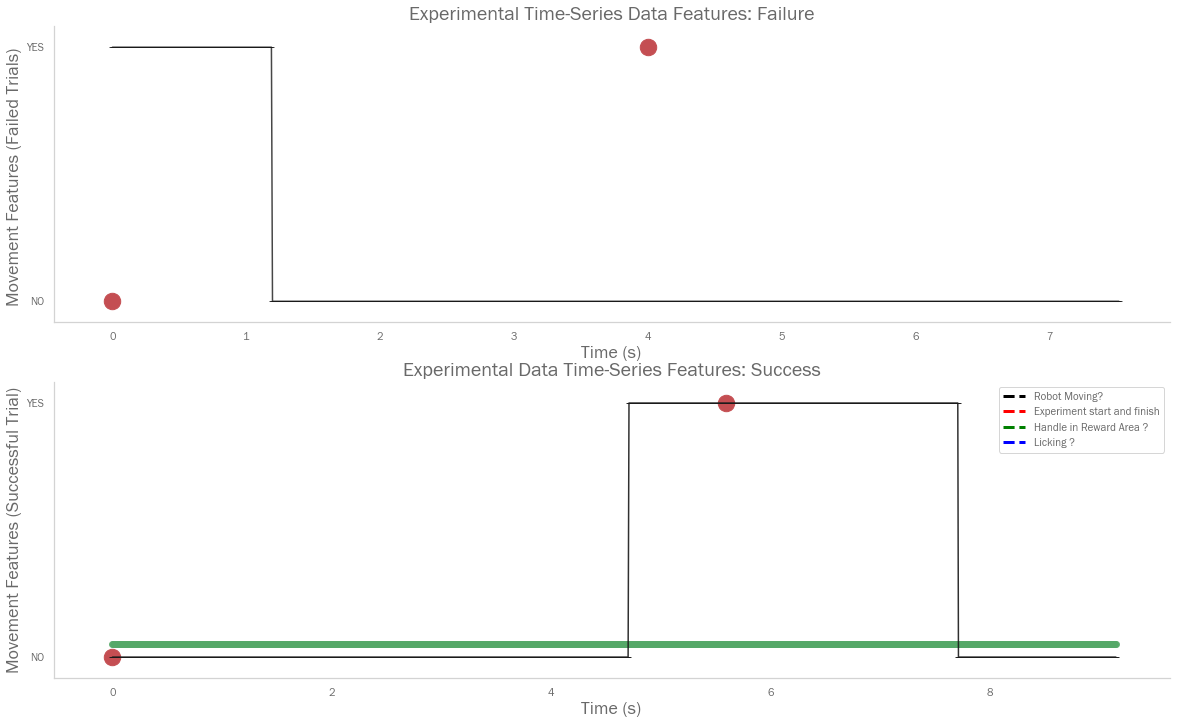

Showing Trial Number  [ 3  4  5  6  7  8  9 11 12 15 16 17 19 21 23 24 25 26 29 31 32 33 34 35
 36]
Total Trials in Block: 38
Number of estimated reaches 31
Average Length of Licking (in seconds) 2.3879031249999976
Average Time Spent in The Reward Area 0.037037037037037035
Average Successful Trial Length (in seconds)  4.001799993515014


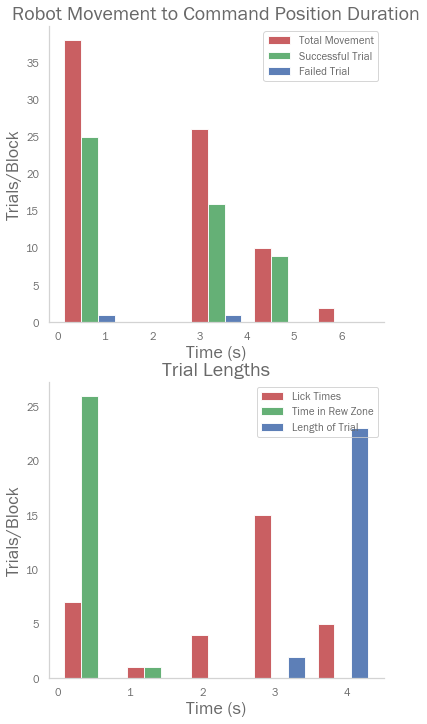

In [148]:
moving_length5, s_move5, f_move5,t,flips,tl,trw,tlen=plot_succ_fail_single(dd_2,dd_2['SF'].to_numpy()[0],[0])

<Figure size 432x288 with 0 Axes>

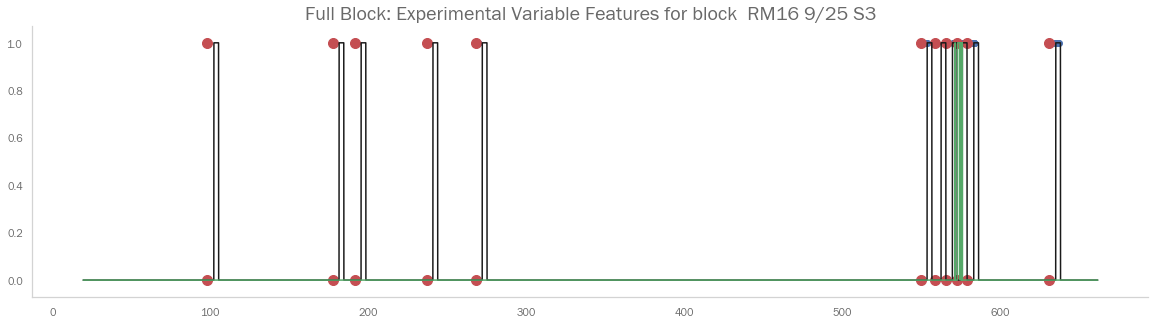

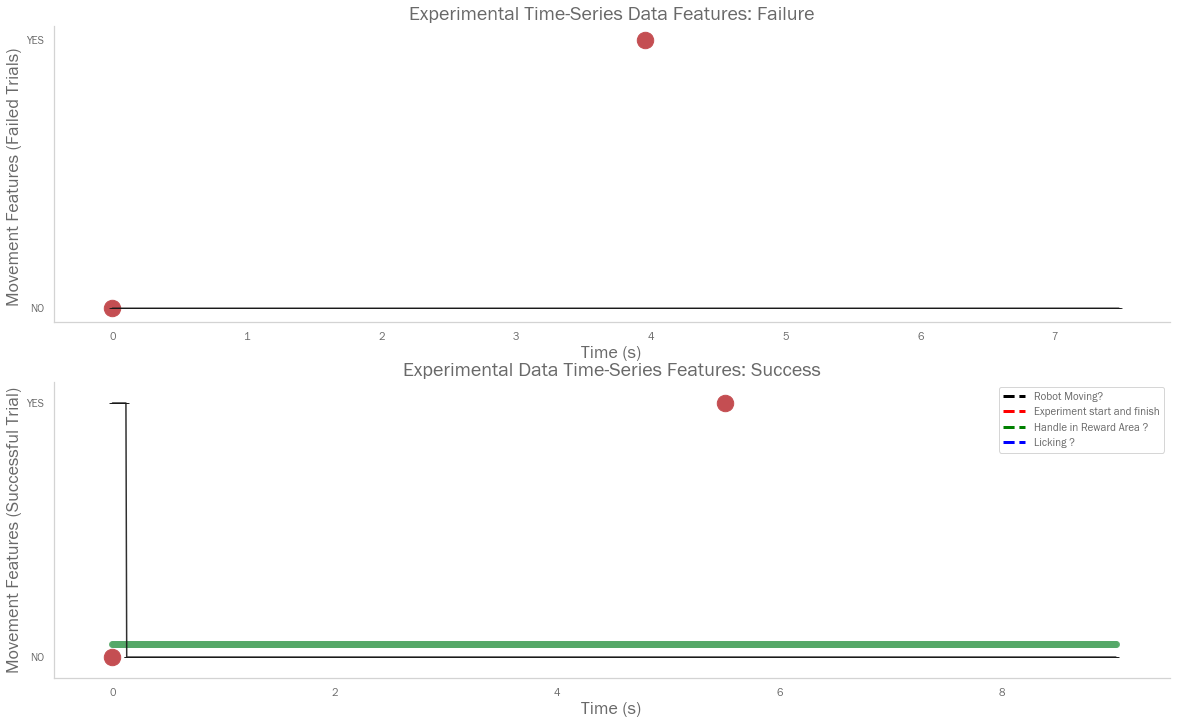

Showing Trial Number  [4 8 9]
Total Trials in Block: 11
Number of estimated reaches 0
Average Length of Licking (in seconds) 0.9000333333333117
Average Time Spent in The Reward Area 0.0
Average Successful Trial Length (in seconds)  3.755666732788086


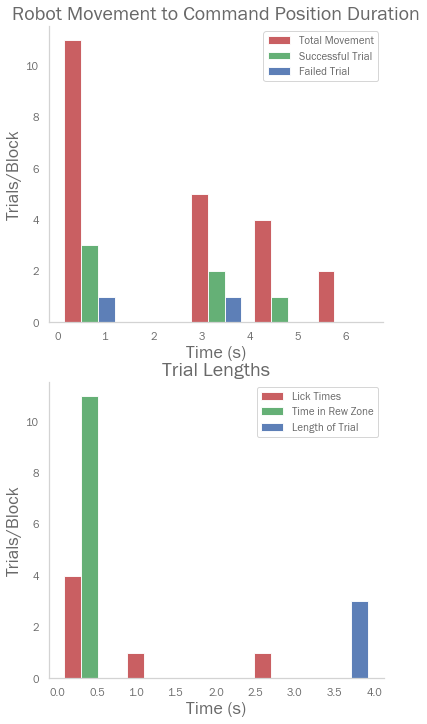

In [150]:
moving_length3, s_move3, f_move5,t,flips,tl,trw,tlen=plot_succ_fail_single(dd_3,dd_3['SF'].to_numpy()[0],[0],s_id=
                                                                          'RM16 9/25 S3')

<Figure size 432x288 with 0 Axes>

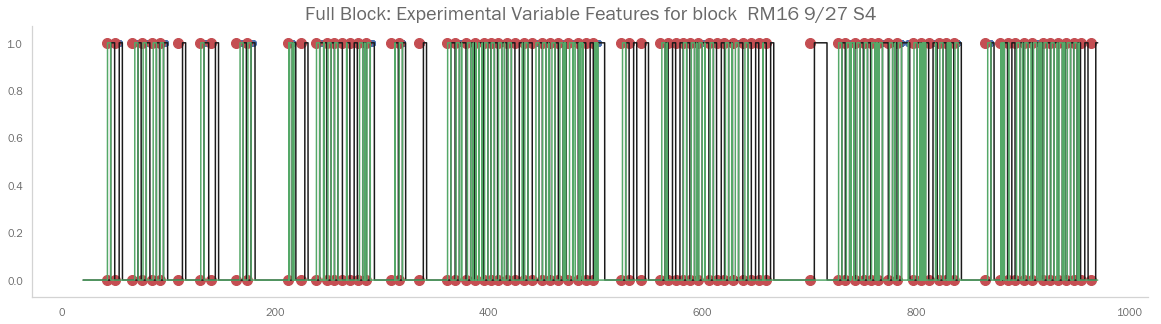

IndexError: list index out of range

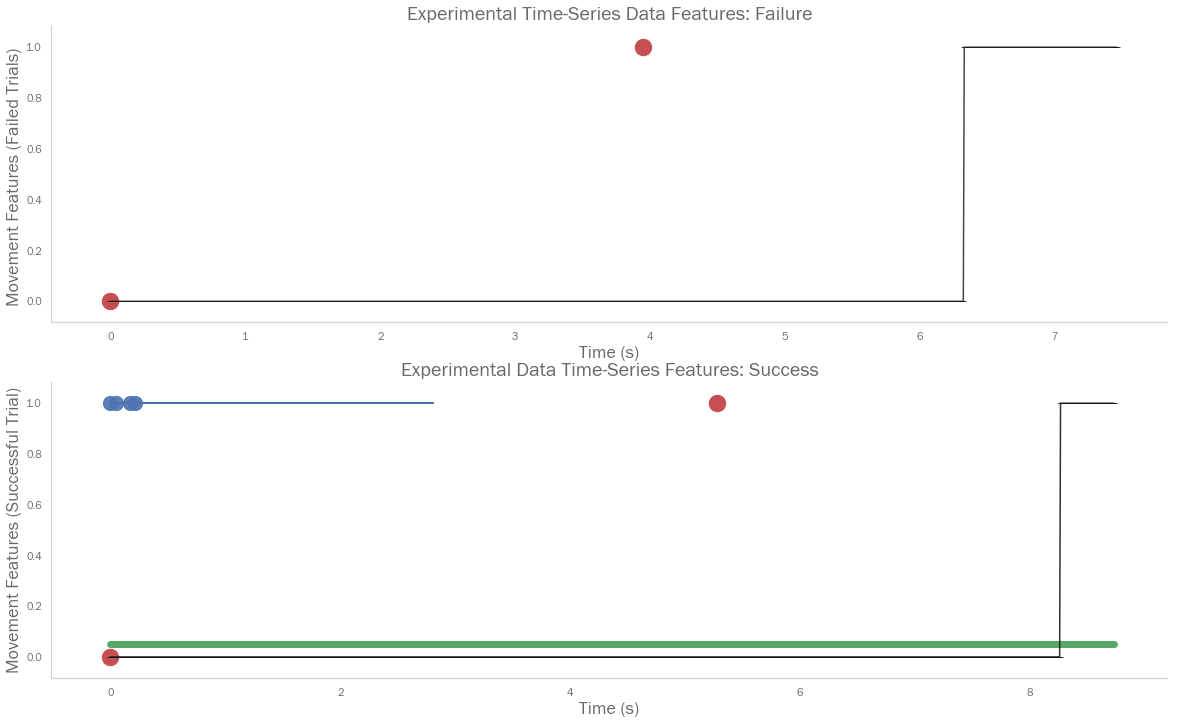

In [151]:
moving_length3, s_move3, f_move5,t,flips,tl,trw,tlen=plot_succ_fail_single(dd_4,dd_4['SF'].to_numpy()[0],[0],s_id=
                                                                          'RM16 9/27 S4')

In [ ]:
plt.hist(s_move,color='g')
plt.title('failed blocks')

In [ ]:
plt.hist(f_move,color='b')
plt.title('Time Length of Robot Moving, Successful Trials')

## Now let's add lick data to the picture. lick data is in experimental computer times (eg real times), so we need to both match these times and check which trials compare to which lick times (and if all the lick times are used!)


In [ ]:
lick_data=dd_1['lick'][0]
lick_data
# inside of a trial, ask if licking occurs, make sure it lines up with the s/F of our trials
# if licking, compute length, get start and stop time indixes of the lick per trial, make histogram of licking times 
def is_lick_in_trial(lick_data,start,stop):
    #### start and stop are the 'm_start' and 'm_stop' vectors from the experimental dataframe.
    # These are in experimental computer time
    l_succ_start = []
    l_start = []
    l_stop=[]
    l_length=[]
    l_time=[]
    for i,t in enumerate(start):
        f=stop[i]
        # if lick_data is between the start and stop of experiment, let's pull the trial #, time vector for plotting, and the duration #
        # is l within?
        for c,l in enumerate(lick_data):
            if 0 < c <= len(lick_data) -1:
                if i <= l <= t:
                    l_succ_start.append(i) # append succ trial #
                    l_time.append(l)
                    if lick_data[c-1] < l - 5: # ask if past lick has been uninitiated for more than 5 seconds 
                        l_start.append(l)
                    if lick_data[c+1] > l+5: # is next lick entry more than 5 away?
                        l_stop.append(l)
    for s,x in enumerate(l_stop):
        strt=l_start[s]
        l_length.append(x-strt)
    l_start=np.unique(l_start)
    l_stop=np.unique(l_stop)
    l_succ_start=np.unique(l_succ_start)
    l_time=np.unique(l_time)
    return l_succ_start,l_start,l_stop,l_length,l_time


def lick_mask(lick,time):
    
    z=np.zeros((len(time)))
    for c,l in enumerate(lick):
        if :
            z[c]=1
    return z

        

In [ ]:


def single_trial_lick(lick,time,start,stop,trial_list):
    l_succ_start = []
    l_start = []
    l_stop=[]
    l_length=[]
    l_time=[]
    e_time=[]
    moving_length=[]
    for i,st in enumerate(start):
        trial=trial_list[i]
        stx=stop[i]
        ts=time[st:stx+300] # time-series to look for licking in
        #e_time.append(ts[-1]-ts[0])
        ## robot stuff ##
        time=trial['time'][0][st:stx+500]
        start_time= trial['time'][0][st:stx]
        exp_time=np.asarray(time,dtype=float)-time[0] # this is normalized trial time
        REW_time=start_time[-1]-start_time[0]
        moving_length.append(REW_time)
        lick_mask=np.zeros((len(time)))
        for c,v in enumerate(lick):
            v=round(v,1) # get 1st decimal precision
            for idx,frames in enumerate(time):
                frames=round(frames,1)
                if frames == v:
                    lick_mask[idx] = 1
    return l_succ_start,l_start,l_stop,l_length,l_time, lick_mask,exp_time, REW_time, moving_length, e_time

In [ ]:
lick=dd_1['lick'][0]
time=dd_1['time'][0]

l_succ_start,l_start,l_stop,l_length,l_time, lick_mask,exp_time, REW_time, moving_length, e_time = single_trial_lick(lick,time,start,stop,trial_list)

In [ ]:
ax=plt.figure(1,figsize=(20,10))
plt.plot(lick_mask)

plt.title('Licking across Block 3, 9/20 RM16')
plt.xlabel('time(s)')
plt.ylabel('licking (y/n)')
plt.show()

In [ ]:
suc,lstart,lstop,l_length,ltime=is_lick_in_trial(lick_data,dd_1['m_start'][0],dd_1['m_stop'][0])
ltime 